# Hypergeometric Distribution

## Can we use the normal distribution to approximate the binomial distribution in the Enchantments Lottery?

With the Enchantments Lottery, you can either win or lose. The marginal probability of winning a permit in 2023 was **6.39% (2558/40031)**. Subsequenty, the odds of *not* winning a permit in 2023 were 93.61% (1 - 0.0639).

However, people sometimes apply in "groups" to increase their chances of winning the lottery. For example, four people will apply individually but with a group size of four. Each individual's application has a chance of winning. If any one of them win, the others are invited on the trip. Thus, the applicants increase their odds of going on at least one backpacking trip into the Enchantments despite only being able to apply once.

The question we want to explore is how this strategy affects a person's odds of "winning" the lottery.

Working through my statistics book I wanted to discover if the chances of success could be estimated using a normal distribution, compared to something like a binomial distribution.

## Citation

The statistical information and quotes on this page are taken from a college textbook which is comprised of three other books:

*Business Statistics*
by Robert A. Donnelly, Jr.
Copyright © 2013 by Pearson Education, Inc.
Published by Prentice Hall
Upper Saddle River, New Jersey 07458

*Business Statistics, Second Edition*
by Norean R. Sharpe, Richard D. De Veaux, and Paul F. Velleman with contributions by David Bock Copyright © 2012, 2010 by Pearson Education, Inc.
Published by Addison-Wesley Boston, Massachusetts 02116

*Basic Business Statistics: Concepts & Applications, Twelfth Edition* by Mark L. Berenson, David M. Levine, and Timothy C. Krehbiel Copyright © 2012, 2009, 2006, 2004, 2002 by Pearson Education, Inc.
Published by Prentice Hall

## Binomial Distribution

>A binomial probability distribution allows us to calculate the probability of a specific number of successes for a certain number of trials

When first exploring the question of having multiple people in a group apply I needed to make sure that the binomial distribution was the right choice. Turns out, it wasn't! There are a few assumptions that aren't true.

Binomial experiments have these four characteristics:
1. Fixed number of trials
2. Only two possible outcomes
3. Probability of success and failure are constant throughout the experiment
4. Each trial is independent of the other trials in the experiment

The Enchantments Lottery breaks rules 3 and 4 because the trials are not independent if we are assuming a fixed number of permits awarded. This makes the binomial distribution the wrong fit.

## Hypergeometric Distribution

>The hypergeometric distribution is used when samples are taken from a finite population without being replaced

Conversely, the hypergeometric distribution may work, given some assumptions. If we assume that:
1. Each entry has an equal chance of winning
2. Each entry is randomly selected
3. There are a fixed number of permits awarded each year (2,558 in the year 2023)

With the hypergeometric model we can calculate the probability of *x* successes in *n* trials using a populations probability (calculated from *R* number of successes out of *N* population size). **The hypergeometric model is more appropriate because each winning application affects the chance of the next application winning**.

First let's define our variables:

- N = The population size = 40,031 entries
- R = The number of successes in the population = 2,558 permits
- n = The sample size = 4 (you and three other friends)
- x = The numer of successes in the sample = 1

### Equation for Hypergeometric Distribution

The equation for the hypergeometric model uses combination calculations. Combination equations are represented a number of ways, here I write them as, <sub>a</sub>C<sub>b</sub>, or  <sub>total</sub>C<sub>selected</sub>

P(x) = <sub>N-R</sub>C<sub>n-x</sub> * <sub>R</sub>C<sub>x</sub> / <sub>N</sub>C<sub>n</sub>

#### After plugging in our numbers for one successful entry out of four

P(1) = <sub>37,473</sub>C<sub>3</sub> * <sub>2558</sub>C<sub>1</sub> / <sub>40031</sub>C<sub>4</sub>

P(1)
 = (8769389690096 * 2558) / 106981681437601465

 P(1) = 0.2096816812544622

The probability of 1 out of the 4 entries being selected is approximately 21%. Given our assumptions having everyone in your group apply increases your chances considerably!

#### Mean & Std. Dev

We can also calculate the mean and standard deviation of our hypergeometric distribution:

mean = nR / N

mean = 4 * 2,558 / 40,031

mean = 0.2556019085208963

The mean is expressed as, if four samples are selected randomly, we would expect 0.2556 of them to be our groups applications.

standard deviation = √(nR(N - R) / N<sup>2</sup>) * √(N - n / N - 1)

standard deviation = √(4 * 2558(40031 - 2558) / 40031<sup>2</sup>) * √(40031 - 4 / 40031 - 1)

In Python, we can calculate this equation using the `math` module:

```
import math

math.sqrt((((4 * 2558) * (40031 - 2558)) / math.pow(40031, 2))) * math.sqrt(((40031 - 4) / (40031 - 1)))
```

standard deviation = 0.4891327967923988

## Hypergeometric Probability Distribution in Python

The Python package `scipy` has modules for easily building a hypergeometric probability distribution and calculating probabilities from it. This module is helpful for checking our math, plotting distributions, and—of course—calculating probabilities.

In [8]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.hypergeom.html
import numpy as np
from scipy.stats import hypergeom

[N, R, n] = [40031, 2558, 4]
rv = hypergeom(N, R, n)

x = 1 # Number of successes in the sample
p_x = rv.pmf(x)

print(f"Probability of {x} successes in the sample: {p_x:.2%}")

Probability of 1 successes in the sample: 20.97%


In [10]:
mean = rv.mean()

print(f"Mean: {mean:.2f}")

Mean: 0.26


In [11]:
std_dev = rv.std()

print(f"Standard deviation: {std_dev:.2f}")

Standard deviation: 0.49


## Plot the Distribution for the Sample Size

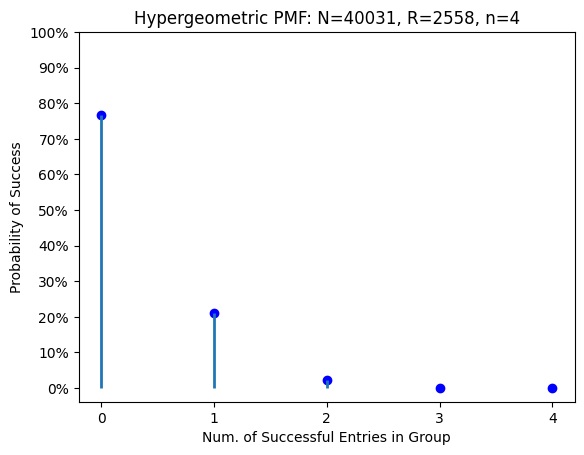

In [24]:
import matplotlib.pyplot as plt

x_n = np.arange(0, n+1)

pmf_n = rv.pmf(x_n)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x_n, pmf_n, 'bo')
ax.vlines(x_n, 0, pmf_n, lw=2)
ax.set_xlabel('Num. of Successful Entries in Group')
ax.set_ylabel('Probability of Success')
# Set y-tick values between 0 and 1
ax.set_yticks(np.arange(0, 1.1, 0.1))
vals = ax.get_yticks()
# Set y-tick labels as percentages
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
ax.set_title('Hypergeometric PMF: N=%i, R=%i, n=%i' % (N, R, n))
ax.xaxis.set(ticks=range(0, n+1))
plt.show()